# Часть 1. Приоритизация гипотез.

### Задачи

 - Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
 - Применить фреймворк RICE для приоритизации гипотез. Отсортировать  их по убыванию приоритета.
 - Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, причину.

ICE — это метод приоритизации, по факторам:
 - Impact — Влияние показывает, насколько ваша идея положительно повлияет на ключевой показатель, который вы пытаетесь улучшить.
 - Confidence — Легкость реализации — это о простоте реализации. Это оценка того, сколько усилий и ресурсов требуется для реализации этой идеи.
 - Ease — Уверенность показывает, насколько вы уверены в оценках влияния и легкости реализации.

RICE — это метод приоритизации. Аббревиатура включает 4 фактора, которые менеджер продукта может смело использовать для оценки и приоритизации продуктовых фич, включают в себя такие факторы как:

 - Reach — это охват
 - Impact — влияние
 - Confidence — уверенность в вашей оценке охвата, влияния и трудозатрат
 - Effort — трудозатраты

## 1.1 ICE

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [3]:
try:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')  
except:
    pass

In [4]:
hypothesis.columns = [x.lower() for x in hypothesis.columns]

In [5]:
pd.options.display.max_colwidth = 150
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['ICE'] = round(hypothesis['ICE'], 2)

In [7]:
hypothesis = hypothesis.sort_values('ICE', ascending=False)

In [8]:
pd.options.display.max_colwidth = 150
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00


Появился топ потенциальных гипотез, среди которых есть "акция, дающая скидку на товар в день рождения". Вряд ли она будет первой в топе с учетом охвата аудитории. 

## 1.2 RICE

In [9]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [10]:
hypothesis = hypothesis.sort_values('RICE', ascending=False)

In [11]:
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


Картина отличается от ICE, приоритет гипотез абсолютно другой.

## 1.3 Вывод

RICE и ICE очень разнятся, по причине того, что RICE охватывает так же и аудиторию. 

Таким образом, гипотеза o "Добавлении формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" первая по приоритету!

### Задачи

 - Построить график кумулятивной выручки по группам.
 - Построить график кумулятивного среднего чека по группам. 
 - Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
 - Построить график кумулятивного среднего количества заказов по группам. 
 - Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A. 
 - Построить точечный график количества заказов по пользователям.
 - Посчитать 95-й и 99-й перцентили количества заказов на пользователя. 
 - Построить точечный график стоимостей заказов.
 - Посчитать 95-й и 99-й перцентили стоимости заказов.
 - Посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. 
 - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
 - Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. 
 - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
 - Принять решение по результатам теста. 
 
Варианты решений: 

1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

# Часть 2. Анализ A/B-теста

### Подготовка датасетов

In [12]:
try:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')  
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
except:
    pass

In [13]:
#orders['group'].unique()
#orders.info()

In [14]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [16]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
#visitors.info()

### Проверка на дупликаты, пропуски, пересечение групп

##### Дубликаты

In [17]:
orders.duplicated().sum()

0

In [18]:
visitors.duplicated().sum()

0

##### Пропуски

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


##### Пересечение групп

In [21]:
d = orders[orders['group'] == 'A'][['visitorId','group']].drop_duplicates().merge(
    orders[orders['group'] == 'B'][['visitorId','group']].drop_duplicates(),
    on = 'visitorId',
    suffixes = ('_A','_B'),
    how = 'outer'
)

In [22]:
d1 = d[~d['group_A'].isna()]

In [23]:
d1[~d1['group_B'].isna()]['visitorId'].nunique()

58

In [24]:
a = d1[~d1['group_B'].isna()]['visitorId']

In [25]:
orders = orders.query('visitorId not in @a')

**Вывод:** 58 пользовтелей попали в обе группы, исключили их, так же обработаны дубликаты и пропуски.

In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [27]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [28]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [29]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [30]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [31]:
cumulativeData['avg_num'] = round(cumulativeData['transactionId'] / cumulativeData['visitorId'], 2)

cumulativeData['avg_check'] = round(cumulativeData['revenue'] / cumulativeData['transactionId'] , 2)

In [32]:
cumulativeData.head(5)

,date,group,transactionId,visitorId,revenue,visitors,avg_num,avg_check
0,2019-08-01,A,23,19,142779,719,1.21,6207.78
1,2019-08-01,B,17,17,59758,713,1.00,3515.18
2,2019-08-02,A,42,36,234381,1338,1.17,5580.50
3,2019-08-02,B,40,39,221801,1294,1.03,5545.02
4,2019-08-03,A,66,60,346854,1845,1.10,5255.36


В результате получился датасет, с которым можно работать.

In [33]:
cumulativeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           62 non-null     datetime64[ns]
 1   group          62 non-null     object        
 2   transactionId  62 non-null     int64         
 3   visitorId      62 non-null     int64         
 4   revenue        62 non-null     int64         
 5   visitors       62 non-null     int64         
 6   avg_num        62 non-null     float64       
 7   avg_check      62 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 4.4+ KB


In [34]:
cumulativeData['group'].unique()

array(['A', 'B'], dtype=object)

In [35]:
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [36]:
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

In [37]:
cumulativeData['visitorId'][cumulativeData['group'] == 'A'].count()

31

In [38]:
cumulativeData['visitorId'][cumulativeData['group'] == 'B'].count()

31

Таким образом имеем Датасет за месяц 01.08.19 - 31.08.19, с 2 чистыми группами для тестирования - А, В, по 31 человеку. 

## 2.1 График кумулятивной выручки по группам.

In [39]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue']]

In [40]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

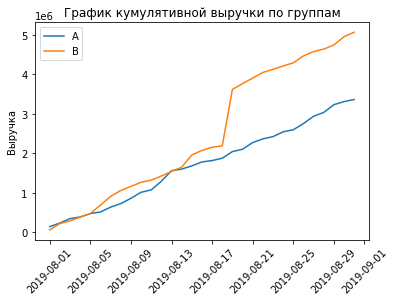

In [41]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend()
plt.show()

У группы B резкий подскок от 2019-08-13, скорее всего - выброс. Группа А - растет линейно.

## 2.2 График кумулятивного среднего чека по группам. 

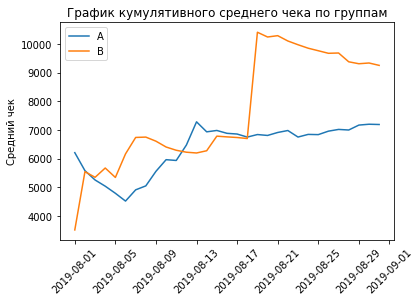

In [42]:
cumulativeAVGA = cumulativeData[cumulativeData['group']=='A'][['date', 'avg_check']]
cumulativeAVGB = cumulativeData[cumulativeData['group']=='B'][['date', 'avg_check']]

plt.plot(cumulativeAVGA['date'], cumulativeAVGA['avg_check'], label='A')
plt.plot(cumulativeAVGB['date'], cumulativeAVGB['avg_check'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.legend()
plt.show()

У группы В тоже самое - подскок от 2019-08-13.

## 2.3 График относительного изменения кумулятивного среднего чека группы B к группе A.

In [43]:
mergedCumulativeAVG = cumulativeAVGA.merge(cumulativeAVGB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [44]:
#mergedCumulativeAVG.head(5)

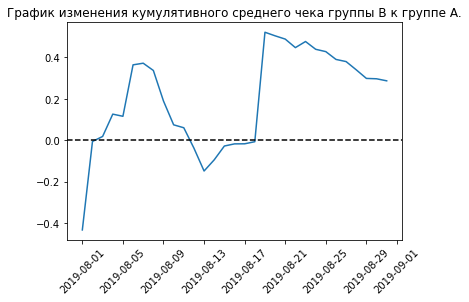

In [45]:
plt.plot(mergedCumulativeAVG['date'], (mergedCumulativeAVG['avg_checkB']/mergedCumulativeAVG['avg_checkA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График изменения кумулятивного среднего чека группы B к группе A.')
plt.xticks(rotation=45)
plt.show()

8-17 явно присутствует аномалия, все 3 графика повторяют одну и ту же картину.

## 2.4 График кумулятивного среднего количества заказов по группам.

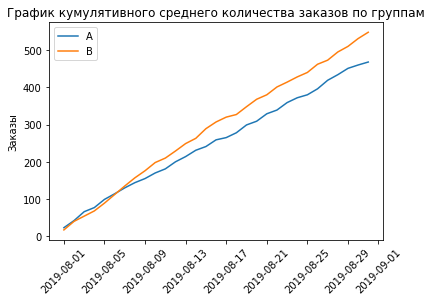

In [46]:
cumulativeTransA = cumulativeData[cumulativeData['group']=='A'][['date', 'transactionId']]
cumulativeTransB = cumulativeData[cumulativeData['group']=='B'][['date', 'transactionId']]

plt.plot(cumulativeTransA['date'], cumulativeTransA['transactionId'], label='A')
plt.plot(cumulativeTransB['date'], cumulativeTransB['transactionId'], label='B')

plt.title('График кумулятивного среднего количества заказов по группам')
plt.ylabel('Заказы')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Выбросов нет, среднее по группе В - немного выше группы А с 2019-08-05

## 2.5 График относительного изменения кумулятивного среднего количества заказов группы B к группе A.

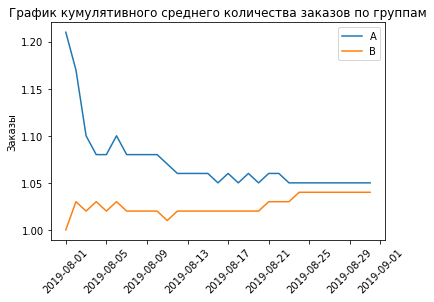

In [47]:
cumulativeAVGNUMA = cumulativeData[cumulativeData['group']=='A'][['date', 'avg_num']]
cumulativeAVGNUMB = cumulativeData[cumulativeData['group']=='B'][['date', 'avg_num']]

plt.plot(cumulativeAVGNUMA['date'], cumulativeAVGNUMA['avg_num'], label='A')
plt.plot(cumulativeAVGNUMB['date'], cumulativeAVGNUMB['avg_num'], label='B')

plt.title('График кумулятивного среднего количества заказов по группам')
plt.ylabel('Заказы')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Несмотря на то, что у группы В среднее количество заказов меньше чем у группы А, виден ее плавный рост. В группе А присутствует аномалия от первого дня, которая, скорее всего влияет на график.

## 2.6 Точечный график количества заказов по пользователям.

In [48]:
orders_per_user = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'}).rename(columns={'transactionid':'orders'})
#orders_per_user.head()

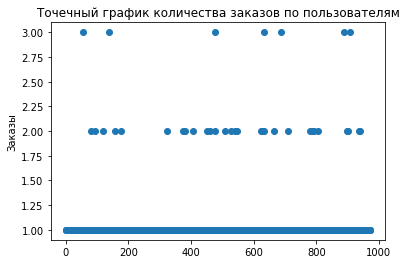

In [49]:
x_values = pd.Series(range(0,len(orders_per_user['transactionId'])))

plt.scatter(x_values, orders_per_user['transactionId'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Заказы')
plt.show()

В основном покупка происходит 1 раз, однако есть пользователи, совершившие 8+ покупок.

## 2.7 95-й и 99-й перцентили количества заказов на пользователя.

In [50]:
print(np.percentile(orders_per_user['transactionId'], [95, 99]))

[1. 2.]


In [51]:
orders_per_user_clear = orders_per_user[orders_per_user['transactionId'] >= 4]['visitorId'].to_list()

Не более чем у 5% количество заказов превышает 2 раз, и не больше чем у 1% заказов - 4+.

Все что сверх 99% - аномально.

## 2.8 Точечный график стоимостей заказов.

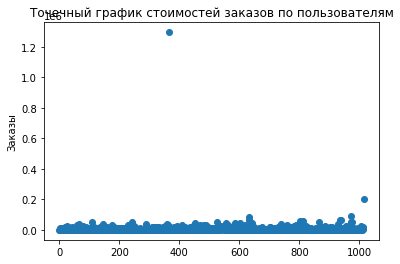

In [52]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов по пользователям')
plt.ylabel('Заказы')
plt.show()

Отчетливо видно, что присутствуют 2 выброса.

## 2.9 95-й и 99-й перцентили стоимости заказов.

In [53]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


In [54]:
orders_revenue_clear = orders.query('revenue <= 58233.2')

Не более чем у 5% стоимость заказов превышает 28000, и не больше чем у 1% стоимость заказов - 58233.2.

Все что сверх 99% - аномально

# 3 Расчет статистической значимости различий

## 3.1 Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным.

In [55]:
import math
import scipy.stats as stats
from scipy import stats as st

In [56]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [57]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [58]:
avg_num = (orders.groupby('group').agg({'transactionId':'count'}).rename(columns={'transactionId':'orders'})).join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
           
avg_num['avg_num'] = avg_num['orders'] / avg_num['visitors']

In [59]:
avg_num

,group,orders,visitors,avg_num
0,A,468,18736,0.024979
1,B,548,18916,0.028970


B среднем количестве заказов между группами B значительно больше. 

H0: Количествo заказов в группе A равна количеству заказов в группе B

H1: Количествo заказов в группе A НЕ равна количеству заказов в группе B

In [60]:
alpha=0.05
purchases = np.array(avg_num['orders'])
leads = np.array(avg_num['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)
if (p_value < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.016851380434703023
Отвергаем нулевую гипотезу


## 3.2 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

H0: Средний чек B превышает средний чек группы A

H1: Средний чек B НЕ превышает средний чек группы A

In [61]:
round(orders[orders['group']=='A']['revenue'].mean(), 3)

7189.436

In [62]:
orders[orders['group']=='B']['revenue'].mean()

9249.94890510949

##### Воспользуемся критерием Манна-Уитни.

Ключевая идея — проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки. Ранг — это место в упорядоченной выборке. Разница между рангами одних и тех же значений может быть одинакова, и такой сдвиг называют типичным. Значит, просто добавились значения, сдвинувшие все остальные.

In [63]:
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='B']['revenue'], orders[orders['group']=='A']['revenue'], True, 'greater')
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.5853381584349621
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Средний чек B превышает средний чек группы A

## 3.3 Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным.

In [64]:
orders_clear = orders[~orders['visitorId'].isin(orders_per_user_clear)]
conversion_clear = (orders_clear.groupby('group').agg({'transactionId':'count'}).rename(columns={'transactionId':'orders'})).join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()

In [65]:
conversion_clear

,group,orders,visitors
0,A,468,18736
1,B,548,18916


H0: Cреднее количество заказов в группе A равна среднему количеству заказов в группе B

H1: Cреднее количество заказов в группе A НЕ равна среднему количеству заказов в группе B

In [72]:
conversion_clear

,group,orders,visitors
0,A,468,18736
1,B,548,18916


In [66]:
alpha=0.05
purchases = np.array(conversion_clear['orders'])
leads = np.array(conversion_clear['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.016851380434703023
Отвергаем нулевую гипотезу


 Cреднее количество заказов в группе A НЕ равна среднему количеству заказов в группе B

## 3.4 Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [67]:
orders_revenue_clear

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


In [68]:
avg_check_clear = (orders_revenue_clear.groupby('group').agg({'transactionId':'count', 'revenue': 'sum'}).rename(columns={'transactionId':'orders'})).reset_index()
avg_check_clear['avg_check'] = round(avg_check_clear['revenue'] / avg_check_clear['orders'], 2)
avg_check_clear.head(5)

,group,orders,revenue,avg_check
0,A,463,3011606,6504.55
1,B,544,3426562,6298.83


In [69]:
#print(avg_check_clear[avg_check_clear['group']=='A']['avg_check'])

In [70]:
#print(avg_check_clear[avg_check_clear['group']=='B']['avg_check'])

H0: Средний чек A НЕ превосходит среднему чеку группы B

H1: Средний чек A превосходит среднему чеку группы B

In [71]:
alpha = 0.05
results = st.mannwhitneyu(avg_check_clear[avg_check_clear['group']=='A']['avg_check'], avg_check_clear[avg_check_clear['group']=='B']['avg_check'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.0
Не получилось отвергнуть нулевую гипотезу


Средний чек A НЕ превосходит среднему чеку группы B

# 4 Pешение по результатам теста.

Статистическая значимость различий по очищенным данным говорит нам о следующем: 

 - Cреднее количество заказов в группе A НЕ равна среднему количеству заказов в группе B
 - Средний чек A НЕ превосходит среднему чеку группы B,
 
##### таким образом можем остановить тест, зафиксировать победу группы В.